<a href="https://colab.research.google.com/github/DJCordhose/buch-machine-learning-notebooks/blob/master/kap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kapitel 4: Supervised Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sklearn
sklearn.__version__

'1.0.2'

## Lineare Regression auf Boston House Prices

In [4]:
import sklearn.datasets as data
boston = data.load_boston()
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X = boston.data[:, 5:6]
y = boston.target

Text(0, 0.5, 'Preis ($1000)')

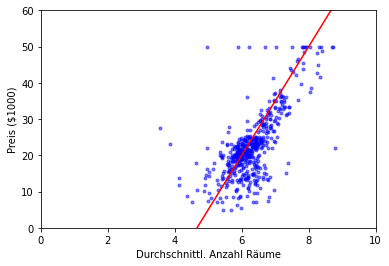

In [7]:
import matplotlib.pyplot as plt

a = 15.; b = -70.
lx = np.arange(4,10)
lguess = a*lx + b

plt.plot(lx, lguess, c='red')
plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlim(0, 10) 
plt.ylim(0, 60)
plt.xlabel('Durchschnittl. Anzahl Räume')
plt.ylabel('Preis ($1000)')

In [8]:
X.shape

(506, 1)

## Ordinary Least Square

In [9]:
import sklearn.linear_model as lm
lr = lm.LinearRegression() # Regressor Instanz
lr.fit(X, y) # Training des Regressors mit den Daten

LinearRegression()

In [10]:
lr.score(X, y) # Validierung

0.48352545599133423

In [11]:
y_pred = lr.predict(X)

In [12]:
y_pred.shape

(506,)

Text(0, 0.5, 'Preis ($1000)')

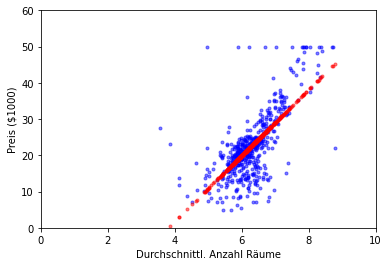

In [13]:
plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')
plt.xlim(0, 10)
plt.ylim(0, 60)
plt.xlabel('Durchschnittl. Anzahl Räume')
plt.ylabel('Preis ($1000)')

## Stochastic Gradient Descent

In [14]:
lr = lm.SGDRegressor()
lr.fit(X, y)

SGDRegressor()

In [15]:
lr.score(X, y)

0.3562372645249312

Text(0, 0.5, 'Preis ($1000)')

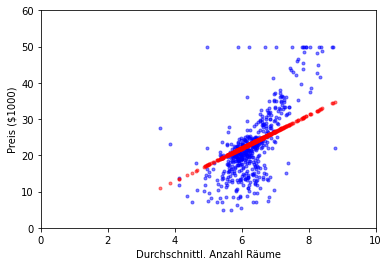

In [16]:
pred = lr.predict(X)
plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.scatter(X, pred, marker='.', alpha=0.5, color='red')
plt.xlim(0, 10)
plt.ylim(0, 60)
plt.xlabel('Durchschnittl. Anzahl Räume')
plt.ylabel('Preis ($1000)')

In [17]:
# n_iter wird nicht mehr unterstützt, dies ist das Äquivalent 
# alte Version (im Text der ersten Auflage beschrieben): https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.SGDRegressor.html
# neue Version (im Text der zweiten Auflage beschrieben): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
#lr = lm.SGDRegressor(n_iter=10000)
lr = lm.SGDRegressor(tol=None)

lr.fit(X, y)

SGDRegressor(tol=None)

In [18]:
lr.n_iter_

1000

In [19]:
lr.score(X, y)

0.46728733539493883

Text(0, 0.5, 'Preis ($1000)')

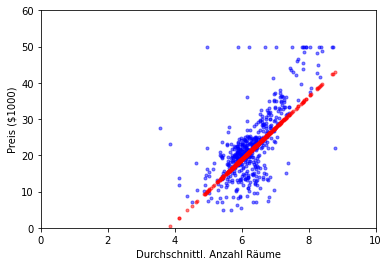

In [20]:
pred = lr.predict(X)
plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.scatter(X, pred, marker='.', alpha=0.5, color='red')
plt.xlim(0, 10)
plt.ylim(0, 60)
plt.xlabel('Durchschnittl. Anzahl Räume')
plt.ylabel('Preis ($1000)')

## Logistische Regression

Text(0, 0.5, 'y')

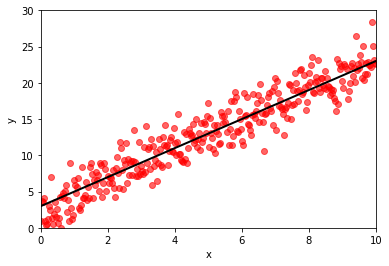

In [21]:
import numpy as np
import matplotlib.pylab as plt

def line(a, b, x):
    return a*x+b

x = np.linspace(0, 10)
a = 2; b = 3
y = line(a, b, x)

size = 333
x_sample = np.linspace(0, 10, size)
y_sample = a * x_sample + b + np.random.normal(loc=0, scale=2, size=size)

plt.scatter(x_sample, y_sample, marker='o', alpha=0.6, c='r')
plt.plot(x, y, c='k', lw=2.)
plt.xlim(0, 10); plt.ylim(0, 30)
plt.xlabel('x'); plt.ylabel('y')

In [22]:
size = 1000
x_sample = np.linspace(0, 10, size)
x_class = np.linspace(0, 10, size)
y_class0 = np.array([r if r <= line(a, b, x) + 3 else -1 for x,r in zip(x_sample, 30 * np.random.uniform(size=size))])
y_class1 = np.array([r if r >= line(a, b, x) - 3 else -1 for x,r in zip(x_sample, 30 * np.random.uniform(size=size))])

Text(0, 0.5, 'y')

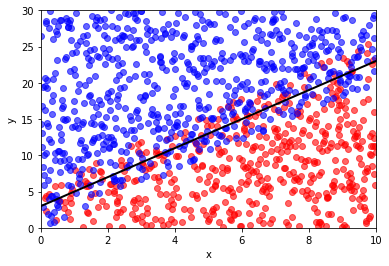

In [23]:
plt.scatter(x_class[:len(y_class0)], y_class0, 	marker='o',alpha=0.6, c='r')
plt.scatter(x_class[:len(y_class1)], y_class1, 	marker='o',alpha=0.6, c='b')
plt.plot(x, y, c='k', lw=2.)
plt.xlim(0, 10); plt.ylim(0, 30)
plt.xlabel('x'); plt.ylabel('y')

Text(0, 0.5, 'y')

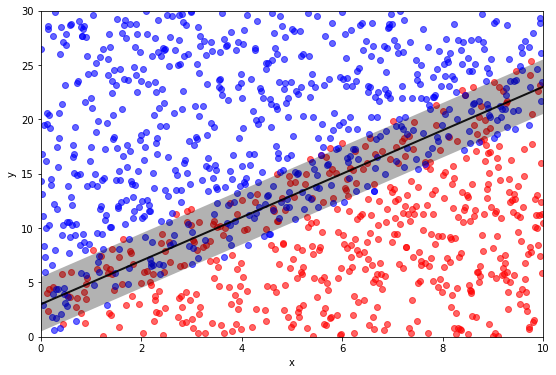

In [24]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(x_class,y_class0, marker='o',alpha=0.6, c='r')
plt.scatter(x_class,y_class1, marker='o',alpha=0.6, c='b')
plt.plot(x,y, c='k',lw=50.,alpha=0.3) # fat transparent line over opaque regression line
plt.plot(x,y, c='k',lw=2.,alpha=0.9) # regression line
plt.xlim(0,10)
plt.ylim(0,30)
plt.xlabel('x')
plt.ylabel('y')

[ 30  45  54  52  54  75  87 100 113 120 124 126 142 151 153 144  97  58
  58  65  65  55  33  10   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  5 11 38 65 74 75 75 73 84
 92 81 64 70 69 51 55 53 37 29 39 45 37 28 25 20]


(0.0, 1.01)

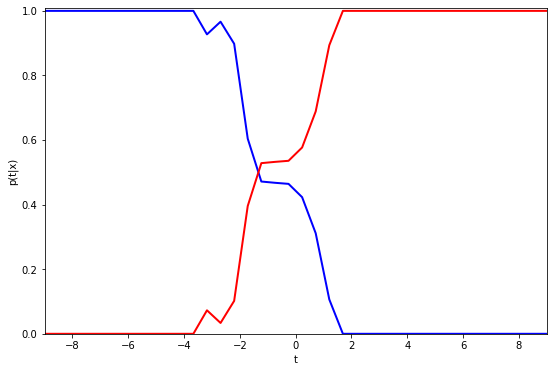

In [25]:
import math
from numpy.linalg import norm

tsize = 40 
t_sample = np.linspace(-10,9,tsize)
t_sample2 = t_sample + 1
def sign_(x,y,a,b): 
    if y > a*x+b:
        return 1
    else:
        return -1

def get_label_bin_p(d0,d1,a,b,x_class,y_class0,y_class1):
    pref1 = np.array([-10,a*(-10)+b])
    pref2 = np.array([10,a*10 + b])
    count_0 = 0
    count_1 = 0
    for ic,xc in enumerate(x_class):
        p3_0 = np.array([xc,y_class0[ic]])
        p3_1 = np.array([xc,y_class1[ic]])
        dc0 = norm(np.cross(pref2-pref1, pref1-p3_0))/norm(pref2-pref1)
        dc1 = norm(np.cross(pref2-pref1, pref1-p3_1))/norm(pref2-pref1)
        dc0_s = sign_(xc,y_class0[ic],a,b)
        dc1_s = sign_(xc,y_class1[ic],a,b)
        dc0 = dc0 * dc0_s
        dc1 = dc1 * dc1_s
        if dc0<d1 and dc0>d0:
            count_0 += 1
        if dc1<d1 and dc1>d0:
            #print(p3_1,dc1,dc1_s)
            count_1 += 1
    return count_0,count_1

p_0 = []
p_1 = []
for it,ts in enumerate(t_sample):
    c0,c1 = get_label_bin_p(ts,t_sample2[it],a,b,x_class,y_class0,y_class1)
    p_0.append(c0)
    p_1.append(c1)
p_0 = np.array(p_0)
p_1 = np.array(p_1)
p_1[:14] = 0
print(p_0)
print(p_1)

fig = plt.figure(1, figsize=(9, 6))

plt.plot(t_sample,p_0/(p_0+p_1), c='b',lw=2.)
plt.plot(t_sample,p_1/(p_0+p_1), c='r',lw=2.)
plt.xlabel('t')
plt.ylabel('p(t|x)')
plt.xlim(-9,9)
plt.ylim(0,1.01)

Text(0, 0.5, 'p(t|x)')

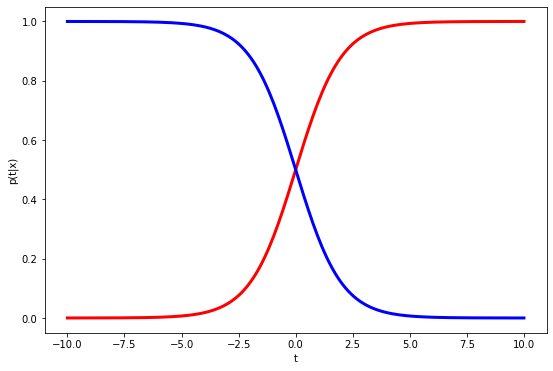

In [26]:
def logf(t):
    return 1./(1 + np.exp( -t ))


# In[33]:

fig = plt.figure(1, figsize=(9, 6))

t = np.linspace(-10,10,200) 
plt.plot(t,logf(t),lw=3.,c='r')
plt.plot(t,1-logf(t),lw=3.,c='b')
plt.xlabel('t')
plt.ylabel('p(t|x)')

Text(0, 0.5, 'logistic function(t)')

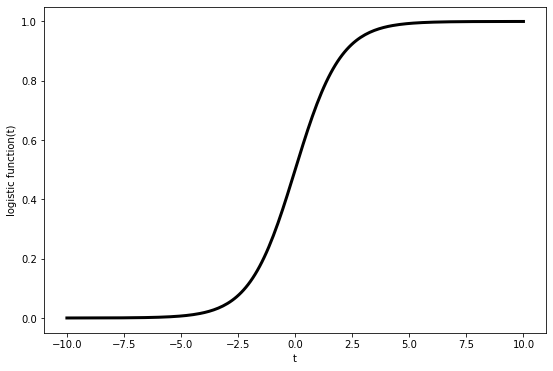

In [27]:
fig = plt.figure(1, figsize=(9, 6))

t = np.linspace(-10,10,200) 
plt.plot(t,logf(t),lw=3.,c='k')
plt.xlabel('t')
plt.ylabel('logistic function(t)')

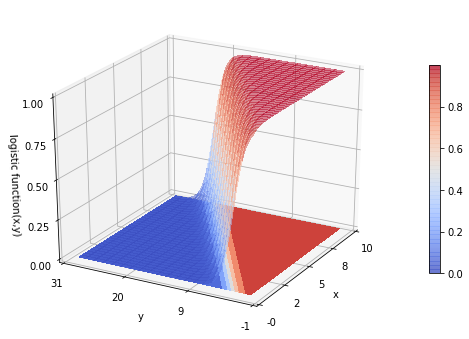

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
#import seaborn as sns

fig = plt.figure()
ax = fig.gca(projection='3d')

def logf_z(p,q,X,Y):
    return (1./(1. + np.exp( -(p*X + q)  + Y )))
    
X = np.arange(0, 10., 0.1)
Y = np.arange(0., 30., 0.1)
X, Y = np.meshgrid(X,Y)

#Z = 1-logf_z(2,3,X,Y)
Z = logf_z(2,3,X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,  rstride=16, cstride=3, alpha=0.5,
                       linewidth=0, antialiased=False)


ax.set_zlim(0., 1.0)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('logistic function(x,y)')

ax.xaxis.set_major_locator(LinearLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.yaxis.set_major_locator(LinearLocator(4))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.00f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.64, aspect=20)

cset = ax.contourf(X, Y, Z, zdir='z', offset=0.001, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-10, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=30, cmap=cm.coolwarm)

#nsample = 1000
#ax.scatter(x_class[0:nsample],y_class0[0:nsample], marker='.',alpha=0.9, c='b')
#ax.scatter(x_class[0:nsample],y_class1[0:nsample], marker='.',alpha=0.9, c='g')

ax.view_init(25, -151)

plt.gcf().subplots_adjust(left=-0.25)
plt.gcf().subplots_adjust(bottom=-0.25)
#plt.xlabel('x')
#plt.ylabel('y')

In [29]:
import sklearn.linear_model as lm
logr = lm.LogisticRegression()

In [30]:
# unfortunately a bit complex to constrcut X
x1 = np.append(x_class[y_class0>=0], x_class[y_class1>=0])
x2 = np.append(y_class0[y_class0>=0], y_class1[y_class1>=0])
X = np.array([x1, x2]).T

# 0 is for class0, 1 for class1
y = np.append(np.zeros(len(y_class0[y_class0>=0])), np.ones(len(y_class1[y_class1>=0])))

In [31]:
logr.fit(X, y)

LogisticRegression()

In [32]:
logr.score(X, y)

0.8547826086956521

## Logistische Regression der Irisdaten

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()

X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [34]:
import sklearn.linear_model as lm 
logr = lm.LogisticRegression()
logr.fit(X,y)
logr.score(X,y)

0.9733333333333334

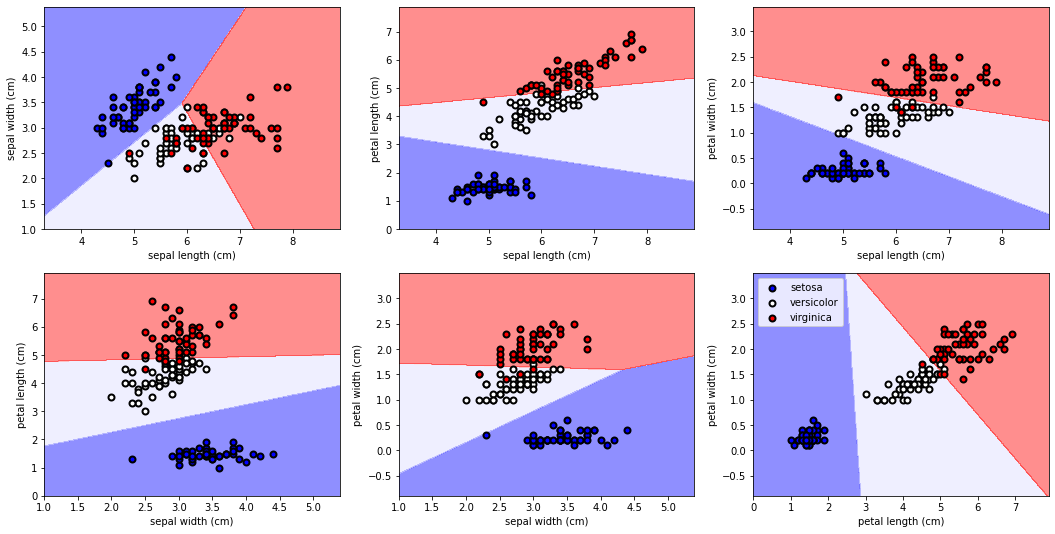

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

n_classes = 3
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow
plot_step = 0.01

fig = plt.figure(1, figsize=(18, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = logr.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')

In [36]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [37]:
for pair in [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]:
    X = iris.data[:, pair]
    y = iris.target

    logrfit = logr.fit(X, y)
    print(logr.score(X, y))

0.82
0.96
0.96
0.9533333333333334
0.96
0.9666666666666667


## Support Vector Machine

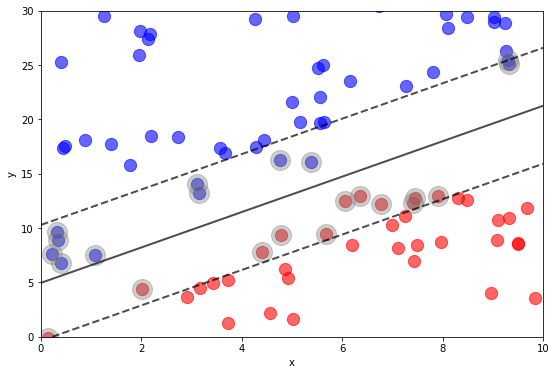

In [38]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
np.random.seed(7529)

fig = plt.figure(1, figsize=(9, 6))

def line(a,b,x):
    return a*x+b

x = np.linspace(0,10)
a = 2
b = 3

xlim = [0,10]
ylim = [0,30]

size = 75
X_0 = np.array([ (x,line(a,b,x) + 2 + np.random.uniform(size=1)*25.) for x in np.random.uniform(size=size)*10  ]).reshape(-1,2)
X_1 = np.array([ (x,line(a,b,x) - 2 - np.random.uniform(size=1)*25) for x in np.random.uniform(size=size)*10  ]).reshape(-1,2)
X = np.append(X_0,X_1).reshape(-1,2)
y = np.array([ 0 if y>line(a,b,x) else 1 for x,y in X])


plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')
plt.xlim(xlim[0],xlim[1])
plt.ylim(ylim[0],ylim[1])
plt.xlabel('x')
plt.ylabel('y')

# Model
from sklearn.svm import SVC
model1 = SVC(kernel='linear', C=1.E-2)
model1.fit(X, y)

NBINS = 25
xg = np.linspace(xlim[0], xlim[1], NBINS)
yg = np.linspace(ylim[0], ylim[1], NBINS)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P1 = model1.decision_function(xy).reshape(Xg.shape)

# decision boundary and margins:
cont = plt.contour(Xg, Yg, P1, colors='k',linewidth=9,
                levels=[-1, 0, 1], alpha=0.7,
                linestyles=['--', '-', '--'])
plt.setp(cont.collections,lw=2)
# support vectors:
plt.scatter(model1.support_vectors_[:, 0],model1.support_vectors_[:, 1],s=400, linewidth=1, facecolors='grey',alpha=0.39);

In [39]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X, y)
model.score(X, y)

1.0

Text(0, 0.5, 'y')

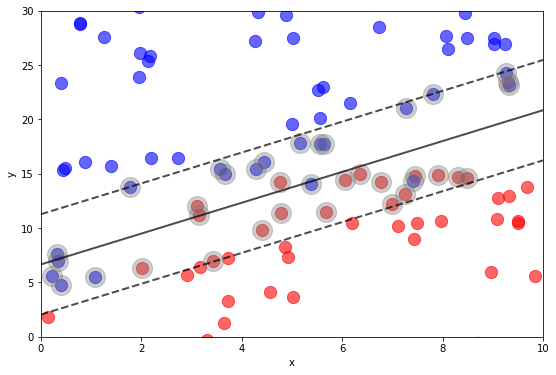

In [40]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
np.random.seed(7529)

fig = plt.figure(1, figsize=(9, 6))

def line(a,b,x):
    return a*x+b

x = np.linspace(0,10)
a = 2
b = 3

xlim = [0,10]
ylim = [0,30]

size = 75
X_0 = np.array([ (x,line(a,b,x) + np.random.uniform(size=1)*25.) for x in np.random.uniform(size=size)*10  ]).reshape(-1,2)
X_1 = np.array([ (x,line(a,b,x) - np.random.uniform(size=1)*25) for x in np.random.uniform(size=size)*10  ]).reshape(-1,2)
X = np.append(X_0,X_1).reshape(-1,2)
y = np.array([ 0 if y > (line(a,b,x) - (np.random.uniform(size=1)*10. - 5) ) else 1 for x,y in X])


plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')
plt.xlim(xlim[0],xlim[1])
plt.ylim(ylim[0],ylim[1])

# Model
from sklearn.svm import SVC
model1 = SVC(kernel='linear', C=1.E-2)
model1.fit(X, y)

NBINS = 25
xg = np.linspace(xlim[0], xlim[1], NBINS)
yg = np.linspace(ylim[0], ylim[1], NBINS)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P1 = model1.decision_function(xy).reshape(Xg.shape)

# decision boundary and margins:
cont = plt.contour(Xg, Yg, P1, colors='k',linewidth=9,
                levels=[-1, 0, 1], alpha=0.7,
                linestyles=['--', '-', '--'])
plt.setp(cont.collections,lw=2)
# support vectors:
plt.scatter(model1.support_vectors_[:, 0],model1.support_vectors_[:, 1],s=400, linewidth=1, facecolors='grey',alpha=0.39);

plt.xlabel('x')
plt.ylabel('y')

## Nichtlineare SVM

In [41]:
import numpy as np
import matplotlib.pylab as plt
np.random.seed(7429)

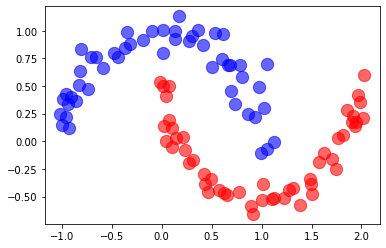

In [42]:
x = np.linspace(0,10)
xlim = [0,10]; ylim = [0,30]

from sklearn.datasets import make_moons
X, y = make_moons(100, noise=0.08, shuffle=True)

plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')

In [43]:
model4 = SVC(kernel='rbf', C=1E6, gamma=1.)
model4.fit(X, y)
print(model4.score(X,y))

1.0


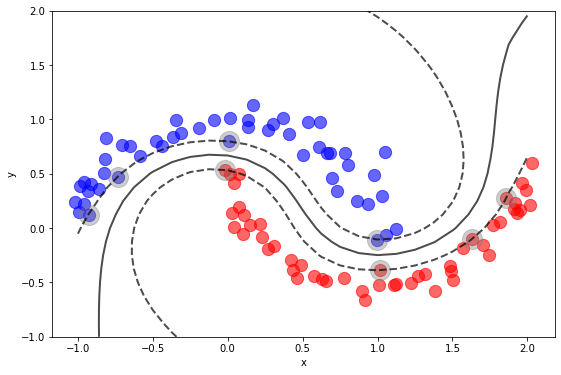

In [44]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')

plt.xlabel('x'); plt.ylabel('y')

# model
from sklearn.svm import SVC
model1 = SVC(kernel='rbf', C=1E6, gamma=1.)
model1.fit(X, y)

NBINS = 25
xg = np.linspace(-1, 2, NBINS)
yg = np.linspace(-1, 2, NBINS)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P1 = model1.decision_function(xy).reshape(Xg.shape)

# decision boundary and margins
cont = plt.contour(Xg, Yg, P1, colors='k',linewidth=9,
                levels=[-1,0,1], alpha=0.7,
                linestyles=['--','-','--'])
plt.setp(cont.collections,lw=2)
# support vectors
plt.scatter(model1.support_vectors_[:, 0],model1.support_vectors_[:, 1],s=400, linewidth=1,  facecolors='grey',alpha=0.39);

### Overfitting

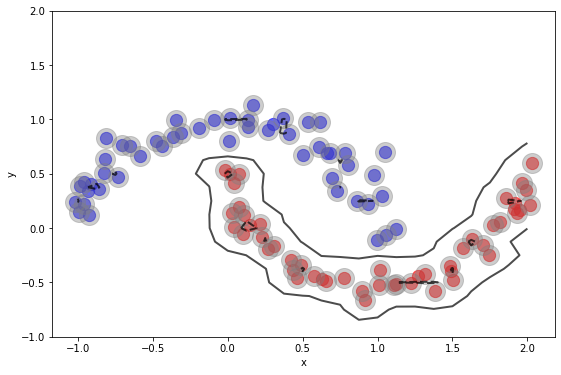

In [45]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')

plt.xlabel('x')
plt.ylabel('y')

# model
model1 = SVC(kernel='rbf', C=1E6, gamma=1E2)
model1.fit(X, y)

NBINS = 25
xg = np.linspace(-1, 2, NBINS)
yg = np.linspace(-1, 2, NBINS)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P1 = model1.decision_function(xy).reshape(Xg.shape)

# decision boundary and margins
cont = plt.contour(Xg, Yg, P1, colors='k',linewidth=9,
                levels=[-1,0,1], alpha=0.7,
                linestyles=['--','-','--'])
plt.setp(cont.collections,lw=2)
# support vectors
plt.scatter(model1.support_vectors_[:, 0],model1.support_vectors_[:, 1],s=400, linewidth=1, facecolors='grey',alpha=0.39);

### Underfitting

Text(0, 0.5, 'y')

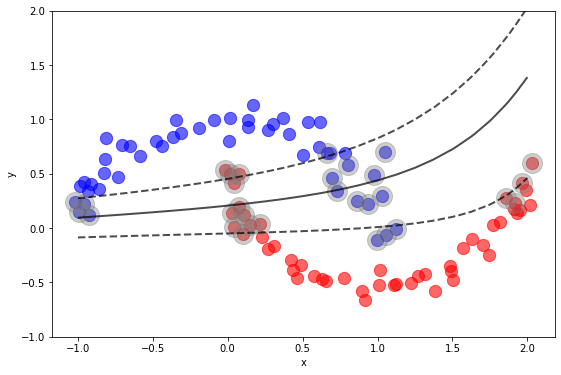

In [46]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(X[y==1][:,0],X[y==1][:,1], s=150, marker='o',alpha=0.6, c='r')
plt.scatter(X[y==0][:,0],X[y==0][:,1], s=150, marker='o',alpha=0.6, c='b')

# model
from sklearn.svm import SVC
model1 = SVC(kernel='rbf', C=1E6, gamma=1E-3)
model1.fit(X, y)

NBINS = 25
xg = np.linspace(-1, 2, NBINS)
yg = np.linspace(-1, 2, NBINS)
Yg, Xg = np.meshgrid(yg, xg)
xy = np.vstack([Xg.ravel(), Yg.ravel()]).T
P1 = model1.decision_function(xy).reshape(Xg.shape)

# plot decision boundary and margins
cont = plt.contour(Xg, Yg, P1, colors='k',linewidth=9,
                levels=[-1,0,1], alpha=0.7,
                linestyles=['--','-','--'])
plt.setp(cont.collections,lw=2)
# support vectors
plt.scatter(model1.support_vectors_[:, 0],model1.support_vectors_[:, 1],s=400, linewidth=1, facecolors='grey',alpha=0.39);

plt.xlabel('x')
plt.ylabel('y')

In [47]:
iris = load_iris()
X = iris.data
y = iris.target

model6 = SVC(kernel='linear', C=1, gamma=1)
model6.fit(X, y)
print(model6.score(X,y))

0.9933333333333333


In [48]:
model7 = SVC(kernel='rbf', C=1, gamma=1)
model7.fit(X, y)
print(model7.score(X,y))

0.98


In [49]:
model8 = SVC(kernel='rbf', C=1000, gamma=1)
model8.fit(X, y)
print(model8.score(X,y))

1.0


In [50]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

In [51]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1E0, gamma=1.)

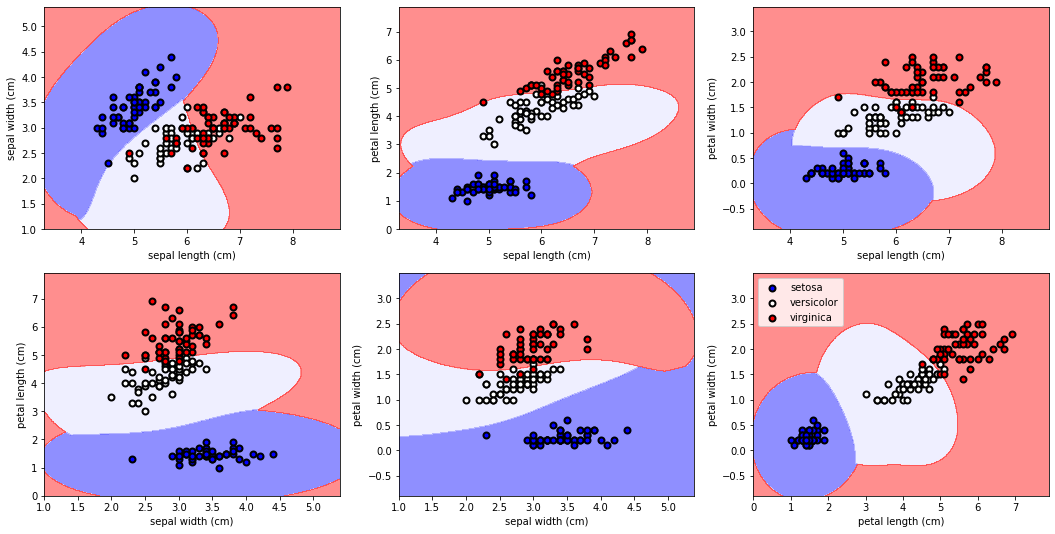

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

n_classes = 3
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow
plot_step = 0.01

fig = plt.figure(1, figsize=(18, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = svc.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')

## Decision Tree Klassifikator

Text(0, 0.5, 'y')

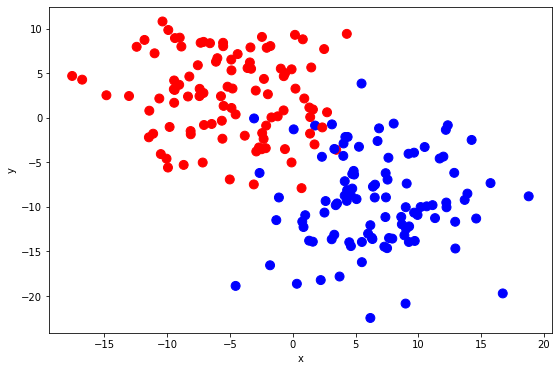

In [53]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt

RNDST = np.random.seed(52)
CMAP = 'bwr'
fig = plt.figure(1, figsize=(9, 6))

X, y = make_blobs(n_samples=200, centers=2, random_state=RNDST, cluster_std=5.)
plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=CMAP)

plt.xlabel('x')
plt.ylabel('y')

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, y)
print(tree.score(X,y))

1.0


Text(0, 0.5, 'y')

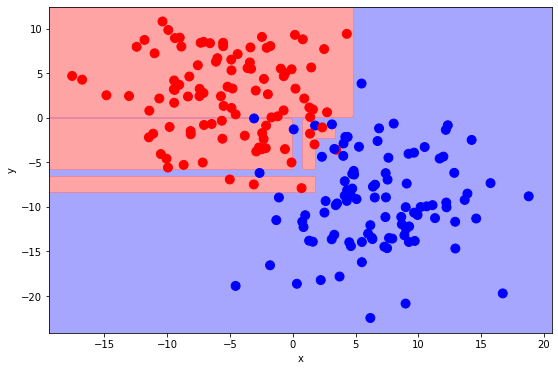

In [55]:
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()
    
ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

(0.0, 1.0, 0.0, 1.0)

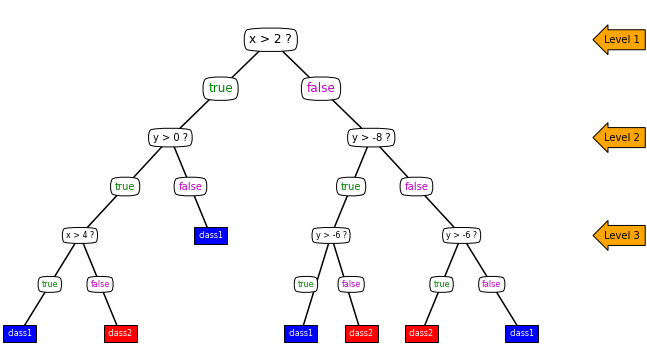

In [56]:
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

def textbox(ax, x, y, t, size=10, fc='w',ec='k', bstyle='round4', **kwargs):
    ax.text(x, y, t, ha='center', va='center', size=size,
            bbox=dict(boxstyle=bstyle, pad=0.5, ec=ec, fc=fc), **kwargs)

slev0 = 12
slev1 = 10
slev2 = 8
slev3 = 6

textbox(ax, 1.2, 0.9, "Level 1", slev1, alpha=0.99,color='k',fc='orange',bstyle='larrow')
textbox(ax, 1.2, 0.6, "Level 2", slev1, alpha=0.99,color='k',fc='orange',bstyle='larrow')
textbox(ax, 1.2, 0.3, "Level 3", slev1, alpha=0.99,color='k',fc='orange',bstyle='larrow')

textbox(ax, 0.5, 0.9, "x > 2 ?", slev0)

textbox(ax, 0.3, 0.6, "y > 0 ?", slev1)
textbox(ax, 0.7, 0.6, "y > -8 ?", slev1)

textbox(ax, 0.12, 0.3, "x > 4 ?", slev2)
#textbox(ax, 0.38, 0.3, "x > 4 ?", slev2)
textbox(ax, 0.62, 0.3, "y > -6 ?", slev2)
textbox(ax, 0.88, 0.3, "y > -6 ?", slev2)

textbox(ax, 0.4, 0.75, "true", slev0, alpha=0.99,color='g')
textbox(ax, 0.6, 0.75, "false", slev0, alpha=0.99,color='m')

textbox(ax, 0.21, 0.45, "true", slev1, alpha=0.99,color='g')
textbox(ax, 0.34, 0.45, "false", slev1, alpha=0.99,color='m')
textbox(ax, 0.66, 0.45, "true", slev1, alpha=0.99,color='g')
textbox(ax, 0.79, 0.45, "false", slev1, alpha=0.99,color='m')

textbox(ax, 0.06, 0.15, "true", slev2, alpha=0.99,color='g')
textbox(ax, 0.16, 0.15, "false", slev2, alpha=0.99,color='m')
#textbox(ax, 0.34, 0.15, "true", slev2, alpha=0.99,color='g')
#textbox(ax, 0.43, 0.15, "false", slev2, alpha=0.99,color='m')
textbox(ax, 0.57, 0.15, "true", slev2, alpha=0.99,color='g')
textbox(ax, 0.66, 0.15, "false", slev2, alpha=0.99,color='m')
textbox(ax, 0.84, 0.15, "true", slev2, alpha=0.99,color='g')
textbox(ax, 0.94, 0.15, "false", slev2, alpha=0.99,color='m')

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '-k')
#ax.plot([0.32, 0.38, 0.44], [0.0, 0.3, 0.0], '-k')
ax.plot([0.56, 0.62, 0.68], [0.0, 0.3, 0.0], '-k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '-k')
ax.axis([0, 1, 0, 1])

textbox(ax, .0, 0., "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')
textbox(ax, .20, 0., "class2", slev2, alpha=0.99,color='w',fc='r',bstyle='square')
#textbox(ax, .32, 0., "class2", slev2, alpha=0.99,color='w',fc='r',bstyle='square')
#textbox(ax, .44, 0., "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')
textbox(ax, 0.38, 0.3, "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')
textbox(ax, .56, 0., "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')
textbox(ax, .68, 0., "class2", slev2, alpha=0.99,color='w',fc='r',bstyle='square')
textbox(ax, .8, 0., "class2", slev2, alpha=0.99,color='w',fc='r',bstyle='square')
textbox(ax, 1., 0., "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')

ax.axis('off')

### Level 1

In [57]:
tree1 = DecisionTreeClassifier(max_depth=1)
tree1.fit(X, y)
print(tree1.score(X,y))

0.91


Text(0, 0.5, 'y')

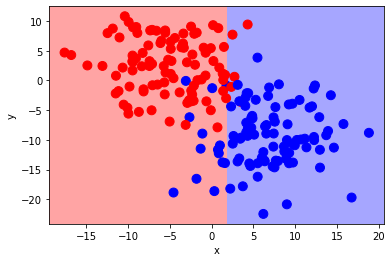

In [58]:
tree1 = DecisionTreeClassifier(max_depth=1)
tree1.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### Level 2

In [59]:
tree2 = DecisionTreeClassifier(max_depth=2)
tree2.fit(X, y)
print(tree2.score(X,y))

0.97


Text(0, 0.5, 'y')

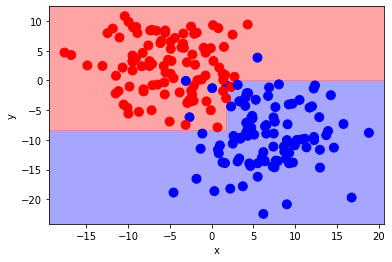

In [60]:
tree2 = DecisionTreeClassifier(max_depth=2)
tree2.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### Level 3

In [61]:
tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X, y)
print(tree3.score(X,y))

0.975


Text(0, 0.5, 'y')

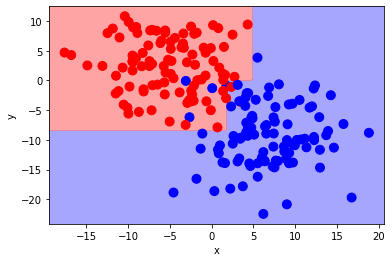

In [62]:
tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### Level 4

In [63]:
tree4 = DecisionTreeClassifier(max_depth=4)
tree4.fit(X, y)
print(tree4.score(X,y))

0.985


Text(0, 0.5, 'y')

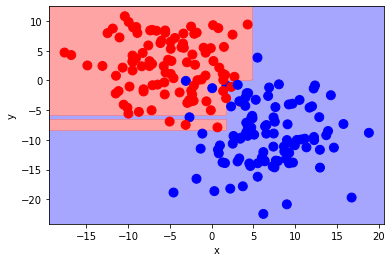

In [64]:
tree4 = DecisionTreeClassifier(max_depth=4)
tree4.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree4.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### Level 5

In [65]:
tree5 = DecisionTreeClassifier(max_depth=5)
tree5.fit(X, y)
print(tree5.score(X,y))

0.99


Text(0, 0.5, 'y')

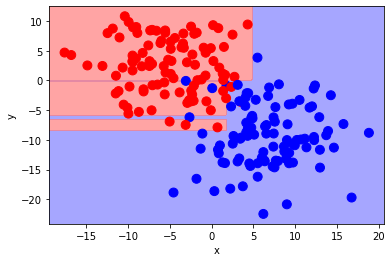

In [66]:
tree5 = DecisionTreeClassifier(max_depth=5)
tree5.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### vs Overfitting

In [67]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=3,
                              min_samples_split=2)
tree.fit(X, y)
print(tree.score(X,y))

0.97


Text(0, 0.5, 'y')

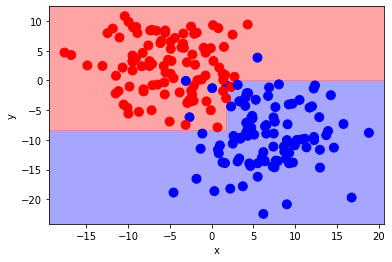

In [68]:
tree5 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=3,min_samples_split=2)
tree5.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

In [69]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=1,
                              min_samples_split=10)
tree.fit(X, y)
print(tree.score(X,y))

0.98


Text(0, 0.5, 'y')

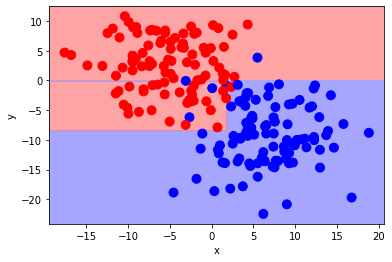

In [70]:
tree5 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=10)
tree5.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

In [71]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              max_leaf_nodes=8)
tree.fit(X, y)
print(tree.score(X,y))

0.98


Text(0, 0.5, 'y')

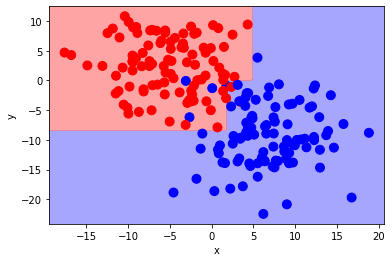

In [72]:
tree5 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=2,max_leaf_nodes=8)
tree5.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

## Split-Kriterium: Gini Impurity vs. Entropy

In [73]:
tree5 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=2,
                               max_leaf_nodes=None,criterion='entropy')
tree5.fit(X, y)

print(tree5.score(X,y))

0.985


Text(0, 0.5, 'y')

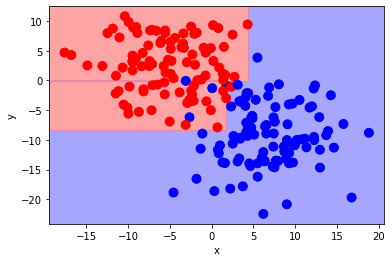

In [74]:
plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')


## Bagging Methods - Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [76]:
rf.fit(X,y)
print(rf.score(X,y))

1.0


In [77]:
X = iris.data
y = iris.target

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
print(rf.score(X,y))

1.0


1.0


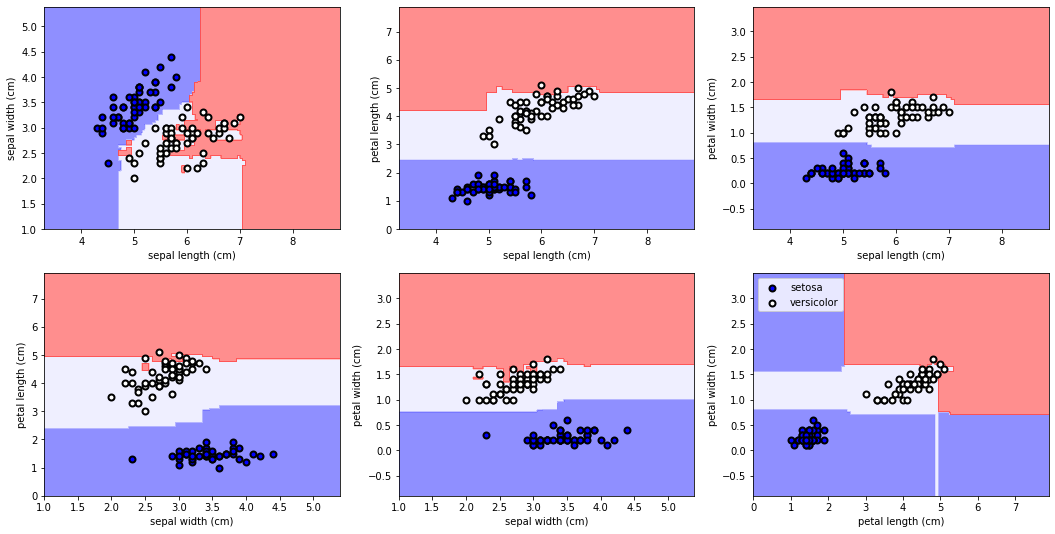

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
print(rf.score(X,y))

# In[ ]:

fig = plt.figure(1, figsize=(18, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = rf.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')
plt.show()

## Boosted Decision Trees

In [79]:
X = iris.data
y = iris.target

from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier()
bdt.fit(X,y)
print(bdt.score(X,y))

0.96


0.96


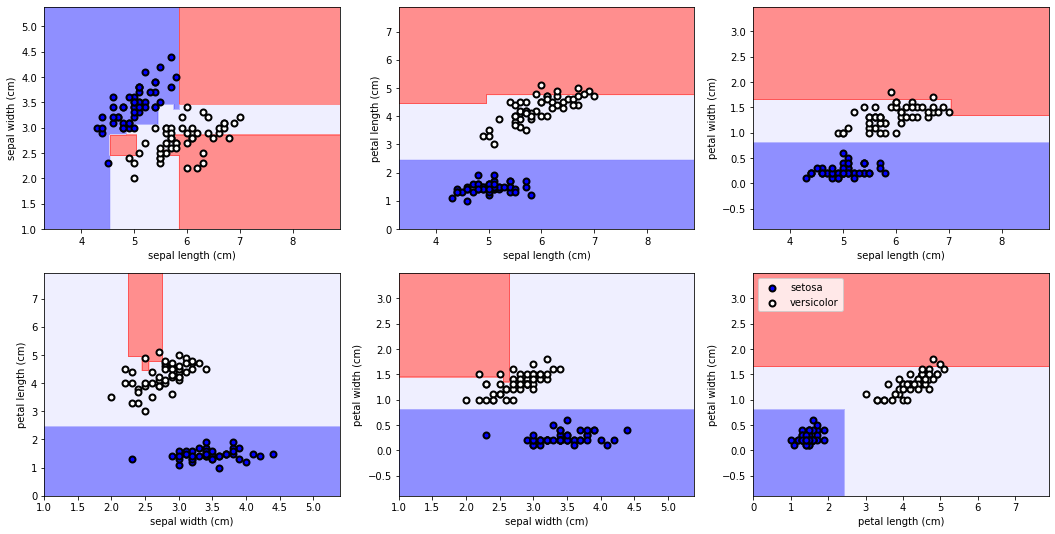

In [80]:
from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier()
bdt.fit(X,y)
print(bdt.score(X,y))

fig = plt.figure(1, figsize=(18, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = bdt.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')
plt.show()